# 1- Kütüphaneleri Yükleme

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Veri Yükleme

In [3]:
# Veri setini notebook içerisine dahil edelim.

df_ = pd.read_excel("/kaggle/input/customer-segmentation-dataset/Online Retail.xlsx")
df = df_.copy()

# 3- Rastgele Veri Oluşturma

In [4]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame: #rasgeleligi sabitlemek icin seed kullanilir
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

# 4- Veriye İlk Bakış

In [5]:
# İlk 10 satırı görelim
print(df.head(10))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES       2.0   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER       6.0   
7    536366     22633               HAND WARMER UNION JACK       6.0   
8    536366     22632            HAND WARMER RED POLKA DOT       6.0   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT      32.0   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26

In [6]:
# Son 10 satırı görelim
print(df.tail(10))

       InvoiceNo StockCode                      Description  Quantity  \
541899    581587     22726       ALARM CLOCK BAKELIKE GREEN       4.0   
541900    581587     22730       ALARM CLOCK BAKELIKE IVORY       4.0   
541901    581587     22367                              NaN       8.0   
541902    581587     22629              SPACEBOY LUNCH BOX       12.0   
541903    581587     23256      CHILDRENS CUTLERY SPACEBOY        4.0   
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS      12.0   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL        6.0   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL        4.0   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE       4.0   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT        3.0   

               InvoiceDate  UnitPrice  CustomerID Country  
541899 2011-12-09 12:50:00       3.75     12680.0  France  
541900 2011-12-09 12:50:00       3.75     12680.0  France  
541901 2011-12-0

In [7]:
df.shape # -> (satır, sütun)

(541909, 8)

In [7]:
df.info()
#Veri çerçevesi hakkında daha detaylı bilgiler sunar.
#Her sütunun veri tipi, veri tiplerinin sayısal dağılımı, bellek kullanımı, eksik değerler ve sütunların ve satırların kaç olduğu bilgisini görürüz.
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526028 non-null  object        
 1   StockCode    525892 non-null  object        
 2   Description  524325 non-null  object        
 3   Quantity     526113 non-null  float64       
 4   InvoiceDate  525810 non-null  datetime64[ns]
 5   UnitPrice    526019 non-null  float64       
 6   CustomerID   394717 non-null  float64       
 7   Country      525826 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 33.1+ MB


In [9]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
df.columns #Pandas'ta bir veri çerçevesinin sütun etiketlerine erişim sağlayan bir özniteliktir.
           #DataFrame'deki sütunların adlarını temsil eden bir Index döndürür.

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
df.describe()
#count: Sütundaki non-null (boş olmayan) değerlerin sayısı.
#mean: Sütundaki değerlerin ortalaması.
#std: Sütundaki değerlerin standart sapması.
#min: Sütundaki en küçük değer.
#25%: Alt çeyrek yüzdesi, sütundaki değerlerin %25'inin altında olan değer.
#50%: Medyan veya ortanca, sütundaki değerlerin yarısından küçük ve yarısından büyük olan değer.
#75%: Üst çeyrek yüzdesi, sütundaki değerlerin %75'inin altında olan değer.
#max: Sütundaki en büyük değer.

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,526113.000000,525810,526019.000000,394717.000000
mean,9.548825,2011-07-04 13:31:54.886175744,4.621448,15287.700910
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13952.000000
50%,3.000000,2011-07-20 08:48:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:38:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,221.218522,NaN,97.707221,1713.806824


# 5- Değişken Açıklaması
Bu veri kümesi, bir e-ticaret platformunda yapılan satış işlemlerine ait detayları içermektedir. Her bir satır, bir ürünün satış işlemine karşılık gelir. Aşağıda, değişkenlerin açıklamaları verilmiştir:

### InvoiceNo (Fatura Numarası)

Tip: object
Açıklama: Satış işlemi için benzersiz bir kimlik numarası. Her bir fatura, birden fazla ürün satışı içerebilir. Eksik değerler, fatura kaydının tam olmadığını gösterebilir.
StockCode (Stok Kodu)

Tip: object
Açıklama: Satılan ürünün stokta kullanılan kimlik numarası. Eksik değerler, belirli ürünlerin stok bilgilerinin eksik olduğunu gösterebilir.

### Description (Ürün Açıklaması)

Tip: object
Açıklama: Satılan ürünün kısa açıklaması. Eksik değerler, bazı ürünlerin açıklamasının sisteme kaydedilmediğini gösterebilir.

### Quantity (Adet)

Tip: float64
Açıklama: Satılan ürünün miktarını ifade eder. Negatif değerler, iadeleri temsil edebilir. Eksik değerler, bazı satışlarda miktar bilgilerinin eksik olduğunu gösterebilir.

### InvoiceDate (Fatura Tarihi)

Tip: datetime64[ns]
Açıklama: Satış işleminin gerçekleştirildiği tarih ve saat. Bu veri, zaman serisi analizi için önemlidir. Eksik değerler, belirli satışların tarih bilgilerinin kaydedilmediğini gösterebilir.

### UnitPrice (Birim Fiyat)

Tip: float64
Açıklama: Satılan ürünün birim fiyatı. Negatif veya sıfır değerler, sistem hatalarını veya özel kampanyaları ifade edebilir. Eksik değerler, bazı ürünlerin fiyat bilgilerinin eksik olduğunu gösterebilir.

### CustomerID (Müşteri Kimliği)

Tip: float64
Açıklama: Satış işlemini gerçekleştiren müşterinin benzersiz kimlik numarası. Eksik değerler, anonim müşteriler veya müşteri bilgisi girilmeyen işlemleri ifade edebilir.

### Country (Ülke)

Tip: object
Açıklama: Satış işleminin gerçekleştirildiği veya müşterinin bulunduğu ülke. Eksik değerler, bazı işlemler için ülke bilgisinin kaydedilmediğini gösterebilir.

# 6- Eksik Veri Analizi

Eksik Veri Analizi ile, veri setimizdeki eksik verileri tespit edip bu durumu uygun bir şekilde düzeltmeyi hedefleriz.

Veri seti içerisinde eksik değerler bulunması yapısal bir bozukluğa işaret eder ve mutlaka uygun yöntemlerle ele alınmalıdır.

Eksik veriler, duruma bağlı olarak veri setinden silinebilir veya uygun veriler ile doldurulabilir. Ancak eksik verilerin silinmesi, silinen satır veya sütunlar içerisinde yer alan diğer verilerin kaybedilmesi anlamına gelir. Eksik verilerin doldurulması işleminde ise, veri setine sentetik bir girdi yapacağımızdan dolayı, doldurma işlemleri veri setindeki dağılımları manipüle edebilir (veri setinde yanlılık oluşturabilir).

Eksik verilerin ne sebeple ortaya çıktığı hassas bir şekilde değerlendirilmeli, nasıl ele alınacağı da bu değerlendirme sonucunda uygun şekilde karar verilmelidir.

In [8]:
df.isna().sum() # -> isna() methodu yerine isnull() methodu da kullanılabilir.

# ALIŞTIRMA: Her bir değişken için, o değişkendeki eksik değer sayısının toplam kayıt sayısının % kaçı olduğunu bulunuz.

InvoiceNo       15881
StockCode       16017
Description     17584
Quantity        15796
InvoiceDate     16099
UnitPrice       15890
CustomerID     147192
Country         16083
dtype: int64

Veri setindeki toplam eksik değer sayısını görmek için tekrar sum() fonksiyonu ekleyebiliriz.

In [9]:
df.isna().sum().sum()

260542

In [10]:
# Eksik olmayan değerlerin sayısı
df.notnull().sum()

InvoiceNo      526028
StockCode      525892
Description    524325
Quantity       526113
InvoiceDate    525810
UnitPrice      526019
CustomerID     394717
Country        525826
dtype: int64

In [11]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 4074730 adet eksik olmayan, 260542 eksik gözlem var.


In [12]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,NaT,4.25,17850.0,United Kingdom
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6.0,NaT,2.10,13047.0,United Kingdom
15,536367,22623,BOX OF VINTAGE JIGSAW BLOCKS,3.0,2010-12-01 08:34:00,NaN,13047.0,United Kingdom
23,536368,NaN,YELLOW COAT RACK PARIS FASHION,3.0,2010-12-01 08:34:00,4.95,13047.0,United Kingdom
25,536369,21756,BATH BUILDING BLOCK WORD,3.0,NaT,5.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4.0,2011-12-09 12:50:00,3.75,NaN,France
541901,581587,22367,NaN,8.0,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12.0,2011-12-09 12:50:00,1.95,12680.0,NaN
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,NaN,France


In [13]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


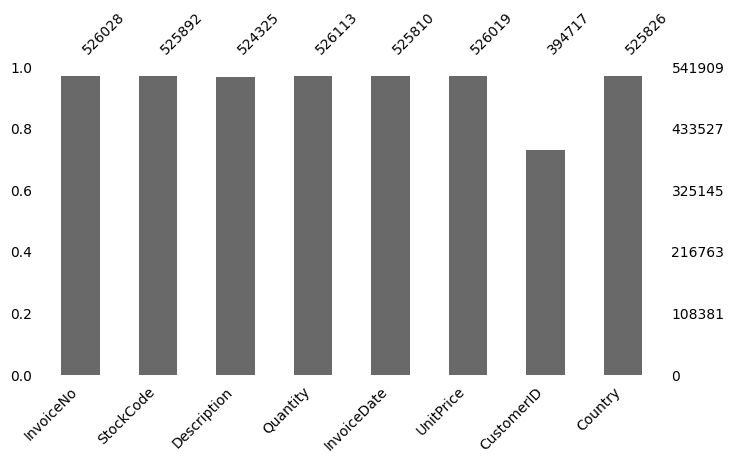

In [14]:
#!pip install missingno -> missingno kütüphanesini kullanabilmek için öncelikle yüklemeniz lazım.
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

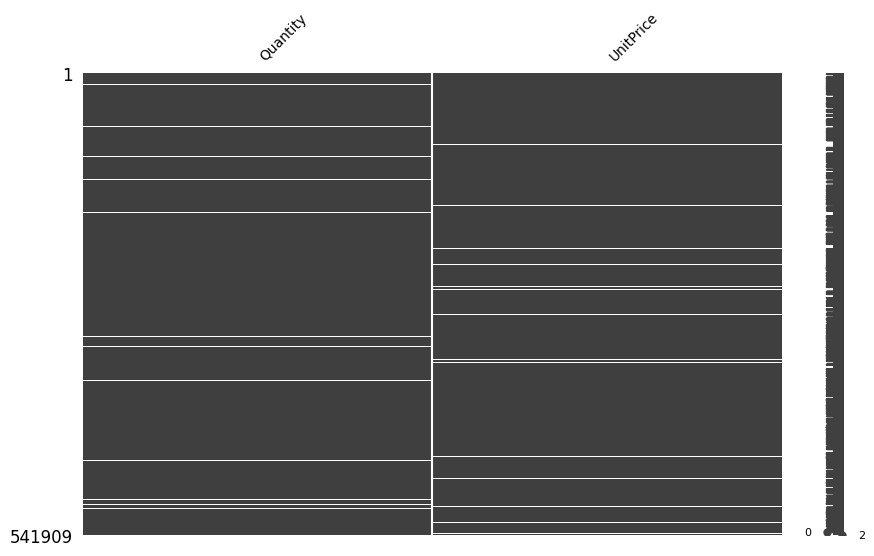

In [17]:
# msno.matrix(), değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla tespit etmek için kullanılabilir.
msno.matrix(df = df[['Quantity', 'UnitPrice']],
            figsize = (10, 6),
            fontsize = 10);

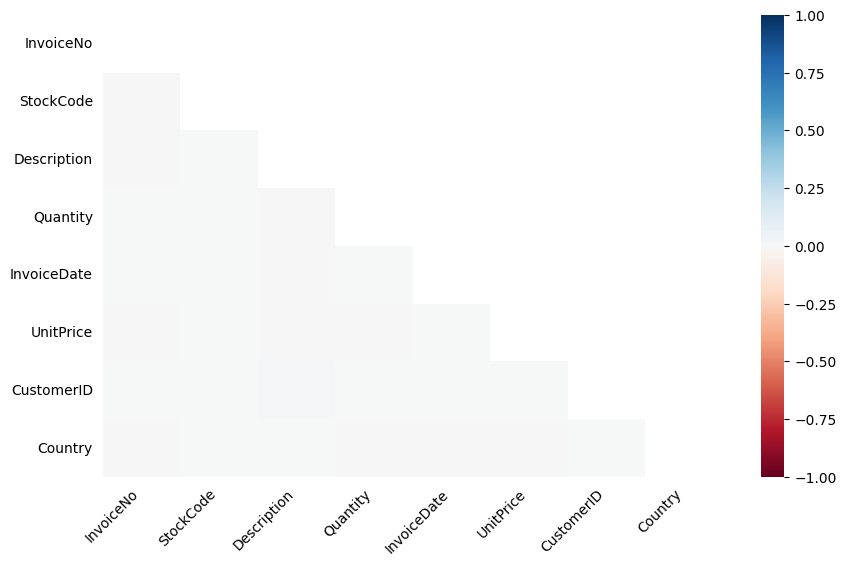

In [18]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

# 7- Eksik Verilerin Silinmesi: 
Eksik verileri silmek, basit bir çözüm olsa da dikkat edilmesi gereken bazı noktalar vardır. İlk olarak, eksikliğin doğal bir durum olup olmadığını değerlendirmek önemlidir (örneğin, elektrikli araçların motor hacmi eksik olabilir). Ayrıca, eğer eksik veriler veri setinin büyük bir kısmını oluşturuyorsa, silme işlemi birçok gözlemi kaybetmenize neden olabilir. Bu, özellikle analiz ve makine öğrenmesi için verinin tamamlayıcılığını kaybetmek anlamına gelir. Bu yüzden, eksik verilerin silinmesi yerine, daha az veri kaybı yaratacak yöntemler tercih edilmelidir.

In [19]:
# Eksik verilerin dropna ile silinmesi.
# Kalıcı bir değişiklik yapmaz, bunu yapmak için inplace argümanı kullanılmalı veya atama yapılmalıdır.

df.dropna(inplace = False)[:5]
#df = df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
# Sadece bütün değerleri eksik olan bir gözlemi silmek istersek;
df.dropna(how = 'all')[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 8- Eksik Verilerin Doldurulması: 

Eksik verilerin doldurulması, dikkatle yapılması gereken bir işlemdir. Yanlış doldurma, veri setine gürültü ekleyebilir ve istatistiksel güvenilirliği bozabilir. Ayrıca, yanlış doldurma analitik sonuçlarda hatalı çıkarımlara yol açabilir. Bu yüzden, eksik verilerin doldurulması gerektiğinde, doğru bir yaklaşım seçilmeli ve olası yanlılıklar göz önünde bulundurulmalıdır.

In [21]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.
df_fillna = df.copy()

df_fillna.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [22]:
df_fillna.isna().sum()

InvoiceNo       15881
StockCode       16017
Description     17584
Quantity        15796
InvoiceDate     16099
UnitPrice       15890
CustomerID     147192
Country         16083
dtype: int64

# 9- Sayısal Değişkenlerin Doldurulması

In [ ]:
# Numerik bir değişkenin mean değeriyle doldurulması
mean_salary = df_fillna['salary'].mean()

df_fillna['salary'].fillna(value = mean_salary, inplace = True)

df_fillna.isna().sum()

In [23]:
# Nümerik değişkenlerin isimlerini tanımlayalım
numeric_columns = ['Quantity', 'UnitPrice']

# Her bir nümerik değişken için mean değeri ile doldurma
for column in numeric_columns:
    mean_value = df[column].mean()  # Kolonun ortalama değerini alıyoruz
    df[column].fillna(value=mean_value, inplace=True)  # NaN değerlerini ortalama ile dolduruyoruz

# Eksik değerlerin kontrol edilmesi
print(df.isna().sum())  # Eksik verileri kontrol edelim


InvoiceNo       15881
StockCode       16017
Description     17584
Quantity            0
InvoiceDate     16099
UnitPrice           0
CustomerID     147192
Country         16083
dtype: int64


/tmp/ipykernel_30/2626964434.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value=mean_value, inplace=True)  # NaN değerlerini ortalama ile dolduruyoruz


 # 10- Kategorik Değişkenlerin Doldurulması

In [25]:
# InvoiceNo için eksik değerlerin sayısını kontrol edelim
df['InvoiceNo'].isna().sum()

# InvoiceNo için en sık karşılaşılan değeri (mode) bulalım
invoice_no_mode = df['InvoiceNo'].mode()[0]

# InvoiceNo'daki eksik değerleri mode değeriyle dolduralım
df['InvoiceNo'] = df['InvoiceNo'].fillna(value=invoice_no_mode)

# InvoiceNo'da eksik değer kalmadığını kontrol edelim
print(df.isna().sum())

InvoiceNo           0
StockCode       16017
Description     17584
Quantity            0
InvoiceDate     16099
UnitPrice           0
CustomerID     147192
Country         16083
dtype: int64


In [26]:
# Aynı işlemi diğer kategorik değişkenler için yapalım
categorical_columns = ['StockCode', 'Description', 'Country']  # Kategorik değişkenlerin listesi

for col in categorical_columns:
    # Her bir kategorik değişkenin eksik değer sayısını kontrol et
    print(f"{col} eksik değer sayısı: {df[col].isna().sum()}")

    # Her bir kategorik değişkenin mod değerini bul
    mode_value = df[col].mode()[0]

    # Eksik değerleri mod değeriyle doldur
    df[col] = df[col].fillna(value=mode_value)

    # Her bir değişkenin eksik değer kalmadığını kontrol et
    print(f"{col} eksik değer sonrası: {df[col].isna().sum()}")

StockCode eksik değer sayısı: 16017
StockCode eksik değer sonrası: 0
Description eksik değer sayısı: 17584
Description eksik değer sonrası: 0
Country eksik değer sayısı: 16083
Country eksik değer sonrası: 0


## CustomerID (Müşteri Kimliği) Doldurulması zor: 

Bu sütun, her bir müşteri için benzersiz bir kimlik numarasını içerdiğinden, eksik bir CustomerID genellikle doğrudan bir hata anlamına gelebilir. Bu nedenle eksik müşteri kimliklerinin doldurulması yerine, eksik verileri silmek genellikle daha doğru bir yaklaşım olacaktır.

In [28]:
df = df.dropna(subset=['CustomerID'])


## Fatura Tarihindeki Eksiklikler İçin Önceki Değer ile Doldurma(Forward Fill):
Fatura tarihindeki eksiklikler, çoğunlukla bir işlem sırasında tarihin eksik kaydedilmesi sonucu ortaya çıkabilir. Bir önceki tarihi almak (ffill - forward fill) bu tür veriler için mantıklı olabilir, çünkü işlem genellikle art arda gerçekleşir.

In [30]:
df['InvoiceDate'] = df['InvoiceDate'].ffill()  # forward fill


Eksik Değer Kontrolü

In [31]:
missing_data = df.isna().sum()
print(missing_data)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Kaç Farklı Ülke Var? 

In [15]:
num_countries = df['Country'].nunique()
print(f"Veri setinde {num_countries} farklı ülke bulunmaktadır.")

Veri setinde 38 farklı ülke bulunmaktadır.


 Ülkeler: 

In [51]:
unique_countries = df['Country'].unique()
print("Farklı ülkeler:")
print(unique_countries)

Farklı ülkeler:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


# 11- Feature Engineering Adımı:

## Ülke Verisini Kıta Bilgisine Dönüştürme

Veri mühendisliği, bir modelin başarısını artırmak ve veri analizinin daha anlamlı hale gelmesini sağlamak için ham veriler üzerinde yapılan dönüşümleri içerir. Bu adımda, Country (Ülke) kolonu kullanılarak, her ülkenin ait olduğu kıta bilgisini belirleyip yeni bir Continent (Kıta) kolonu ekledik.

Adım Adım Açıklama:
Veri Seti İncelemesi:

Verimizin Country sütunu, farklı ülkelerin adlarını içermektedir. Ancak bu bilgiler, kıta düzeyinde analiz yapmak için doğrudan kullanılabilir değildir. Dolayısıyla, ülkeleri belirli kıtalara ayırmamız gerekir.
Kıta Haritası Oluşturulması:

Her ülkenin hangi kıtaya ait olduğu bilgisi, elle oluşturulabilecek bir continent_map sözlüğü ile eşleştirildi. Bu sözlük, her bir ülke isminin karşısına kıtasını yerleştirir.
Örneğin, United Kingdom (Birleşik Krallık) Avrupa kıtasına, Australia (Avustralya) ise Okyanusya kıtasına atanmıştır.
Yeni Kolon Eklenmesi (Feature Engineering):

Country sütunundaki her ülke adı, continent_map sözlüğü kullanılarak kıtasıyla eşleştirildi. Bu işlem, map() fonksiyonu ile gerçekleştirildi.
Bu işlem sonunda, veri setine Continent adında yeni bir kolon eklenmiş oldu. Bu kolon, her bir kaydın ait olduğu kıta bilgisini içeriyor.

In [40]:
# Ülkeleri kıtalara göre eşleştiren bir sözlük oluşturuyoruz
continent_map = {
    "United Kingdom": "Europe",
    "Germany": "Europe",
    "France": "Europe",
    "Australia": "Oceania",
    "Netherlands": "Europe",
    "Norway": "Europe",
    "EIRE": "Europe",  # EIRE (Ireland) olarak kabul edilebilir
    "Switzerland": "Europe",
    "Spain": "Europe",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Italy": "Europe",
    "Belgium": "Europe",
    "Lithuania": "Europe",
    "Japan": "Asia",
    "Iceland": "Europe",
    "Channel Islands": "Europe",  # Channel Islands, İngiltere'ye bağlı
    "Denmark": "Europe",
    "Cyprus": "Europe",
    "Sweden": "Europe",
    "Austria": "Europe",
    "Israel": "Asia",
    "Finland": "Europe",
    "Bahrain": "Asia",
    "Greece": "Europe",
    "Hong Kong": "Asia",
    "Singapore": "Asia",
    "Lebanon": "Asia",
    "United Arab Emirates": "Asia",
    "Saudi Arabia": "Asia",
    "Czech Republic": "Europe",
    "Canada": "North America",
    "Unspecified": "Unknown",  # 'Unspecified' için özel bir kıta
    "Brazil": "South America",
    "USA": "North America",
    "European Community": "Europe",
    "Malta": "Europe",
    "RSA": "Africa"  # RSA (South Africa) olarak kabul edilebilir
}

# Ülke adlarını kıtalarla eşleştirip 'Continent' sütununu oluşturuyoruz
df['Continent'] = df['Country'].map(continent_map)

# Kıtaların bulunduğu yeni veriyi kontrol edelim
print(df[['Country', 'Continent']].head(10))

          Country Continent
0  United Kingdom    Europe
1  United Kingdom    Europe
2  United Kingdom    Europe
3  United Kingdom    Europe
4  United Kingdom    Europe
5  United Kingdom    Europe
6  United Kingdom    Europe
7  United Kingdom    Europe
8  United Kingdom    Europe
9  United Kingdom    Europe


# 12- Veri Görselleştirme

## Ülkelere Göre Toplam Satış Dağılımı (Sales by Country)

Açıklama: Ülkelere göre satış dağılımını görmek için:

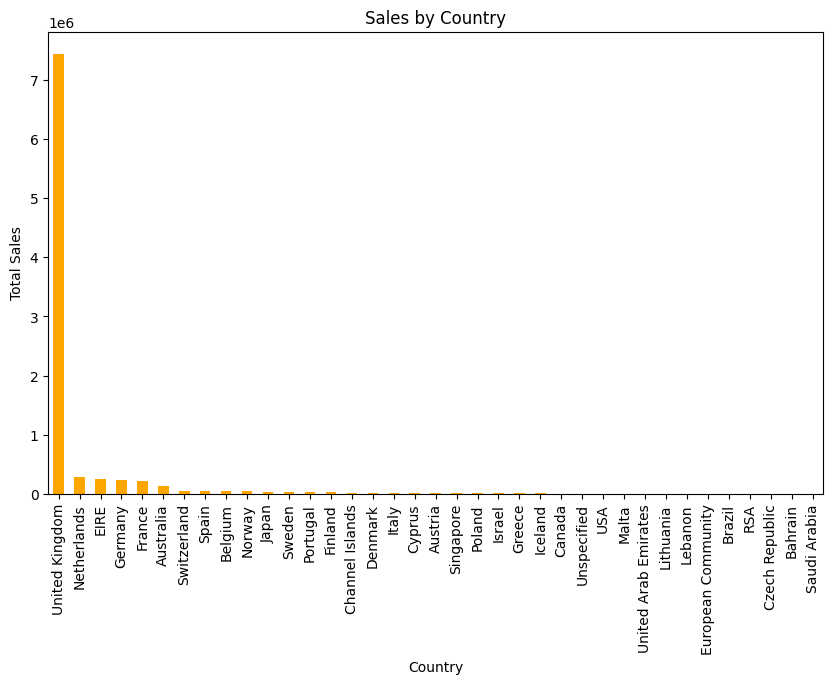

In [42]:
# Ülkelere göre toplam satış
sales_by_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sales_by_country.plot(kind='bar', color='orange')
plt.title("Sales by Country")
plt.ylabel("Total Sales")
plt.show()

## En Çok Satan Ürünler (Top 10 Best-Selling Products)

Açıklama: En çok satılan ürünleri görmek için:

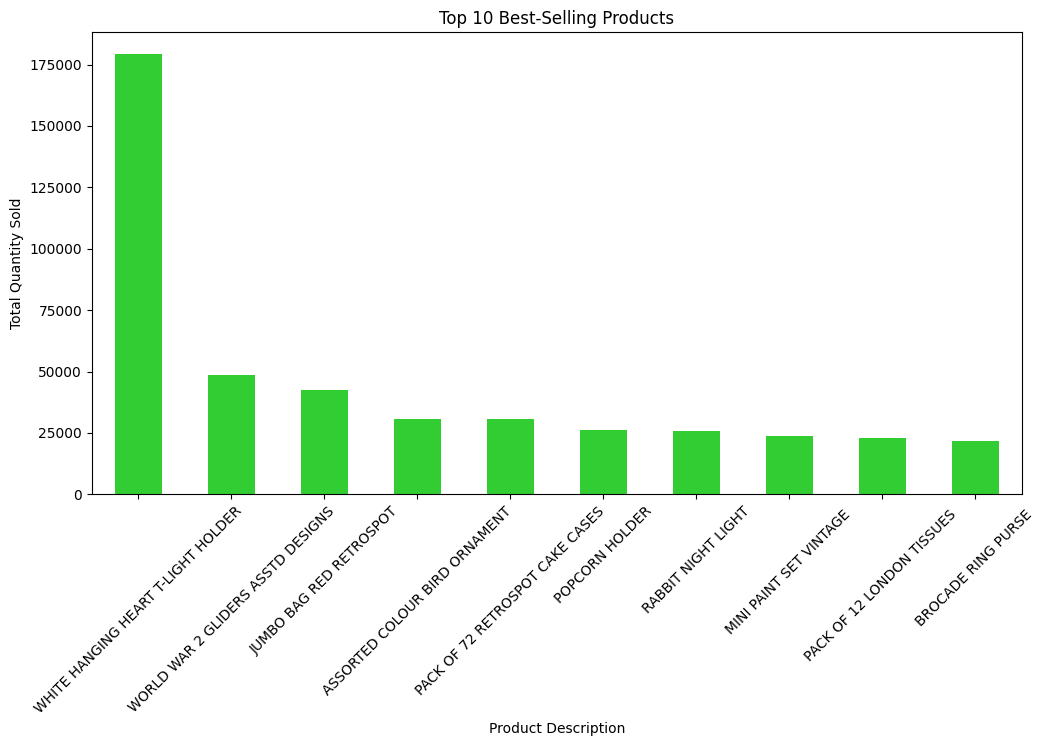

In [43]:
# En çok satan ürünler
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='limegreen')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product Description")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

## Günlük Toplam Satış (Daily Sales Trend)

Açıklama: Günlük toplam satış miktarını görmek için:

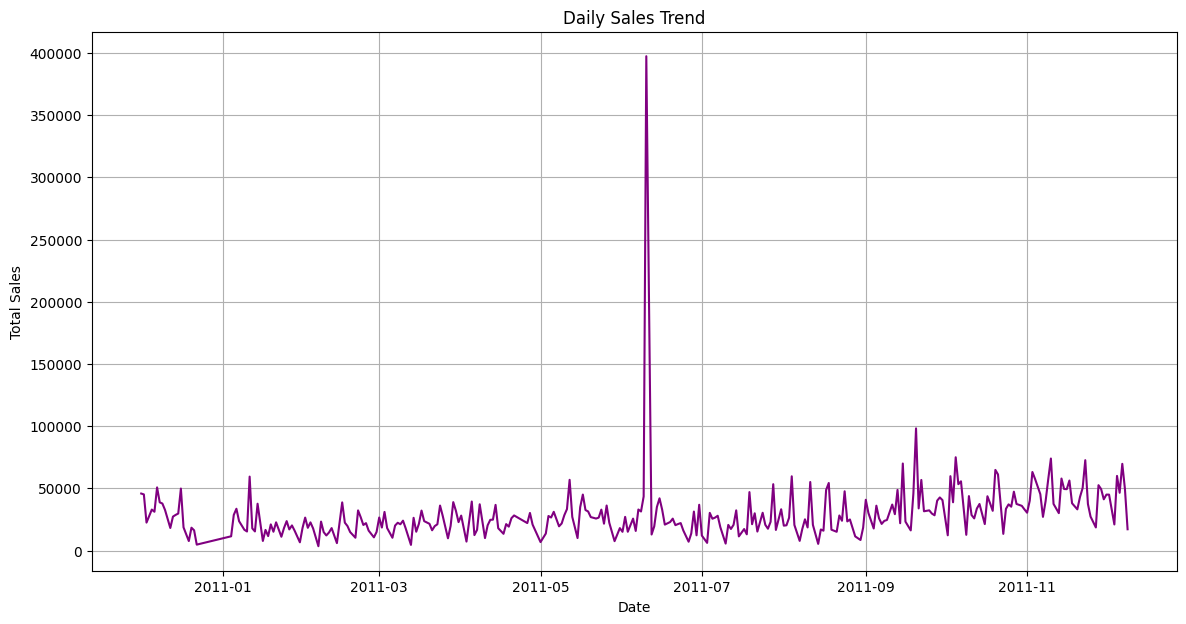

In [44]:
# Günlük toplam satış
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()

plt.figure(figsize=(14, 7))
daily_sales.plot(color='purple')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

## Saatlik Satış Dağılımı (Hourly Sales Distribution)

Satışların gün içerisindeki dağılımını görmek için:

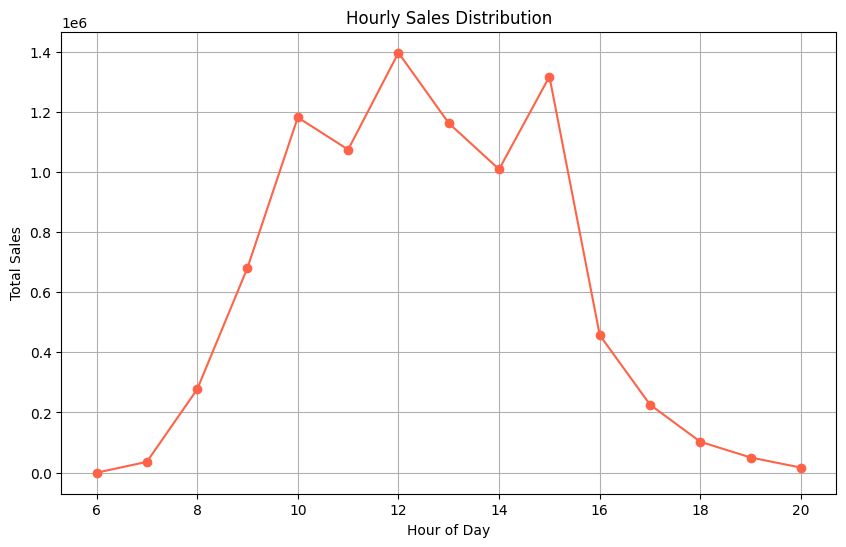

In [46]:
df['Hour'] = pd.to_datetime(df['InvoiceDate']).dt.hour
hourly_sales = df.groupby('Hour')['TotalPrice'].sum()

plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o', color='tomato')
plt.title("Hourly Sales Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


## Yıllara Göre Fatura Sayısı (Time-based Analysis)

Açıklama: Faturaların yıllara göre dağılımını inceleyerek, hangi yıllarda daha fazla işlem yapıldığını görmek. Bu analiz, zaman içindeki eğilimleri görmek ve dönemsel değişimleri analiz etmek için yararlı olabilir.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


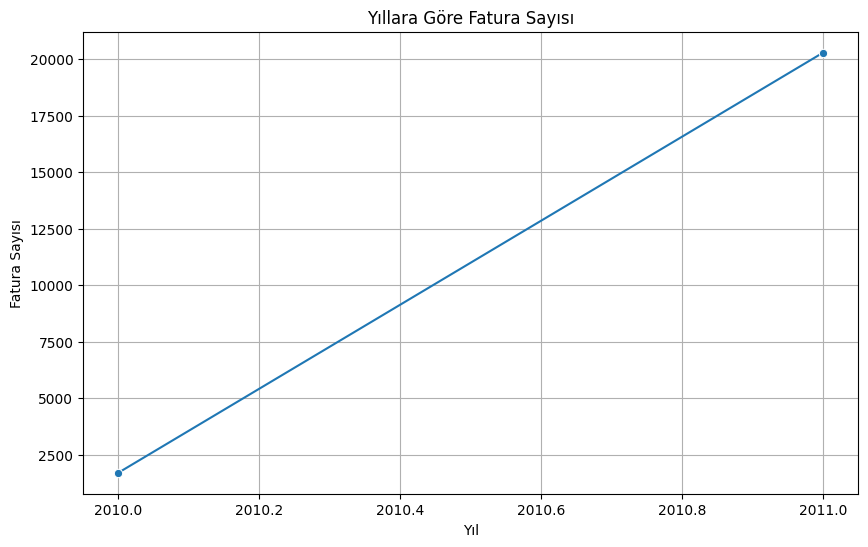

In [48]:
# InvoiceDate'i yıl bazında gruplandırmak
df['InvoiceYear'] = pd.to_datetime(df['InvoiceDate']).dt.year

# Yıllara göre fatura sayısı
invoice_years = df.groupby('InvoiceYear')['InvoiceNo'].nunique()

# Grafik
plt.figure(figsize=(10, 6))
sns.lineplot(x=invoice_years.index, y=invoice_years.values, marker='o')
plt.title('Yıllara Göre Fatura Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Fatura Sayısı')
plt.grid(True)
plt.show()

##  En Çok Satılan Ürün Açıklamaları (Most Sold Products by Description)
 
Açıklama: Ürün açıklamaları bazında, hangi ürünlerin en çok satıldığını analiz ederek popüler ürünler hakkında bilgi edinmek.

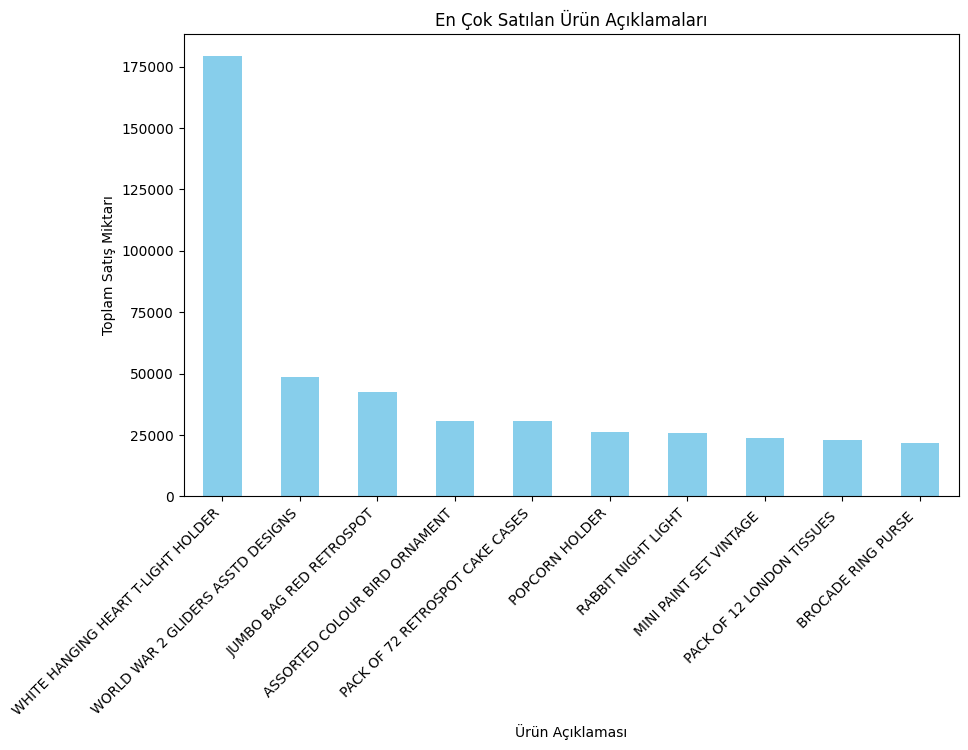

In [49]:
# En çok satılan ürün açıklamaları
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Grafik
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('En Çok Satılan Ürün Açıklamaları')
plt.xlabel('Ürün Açıklaması')
plt.ylabel('Toplam Satış Miktarı')
plt.xticks(rotation=45, ha='right')
plt.show()

## Customer ID'ye Göre Toplam Harcama (Customer-based Spending)

Açıklama: Müşterilerin toplam harcamalarını inceleyerek, en değerli müşterileri belirlemek. Bu tür bir analiz, pazarlama stratejileri için faydalı olabilir.

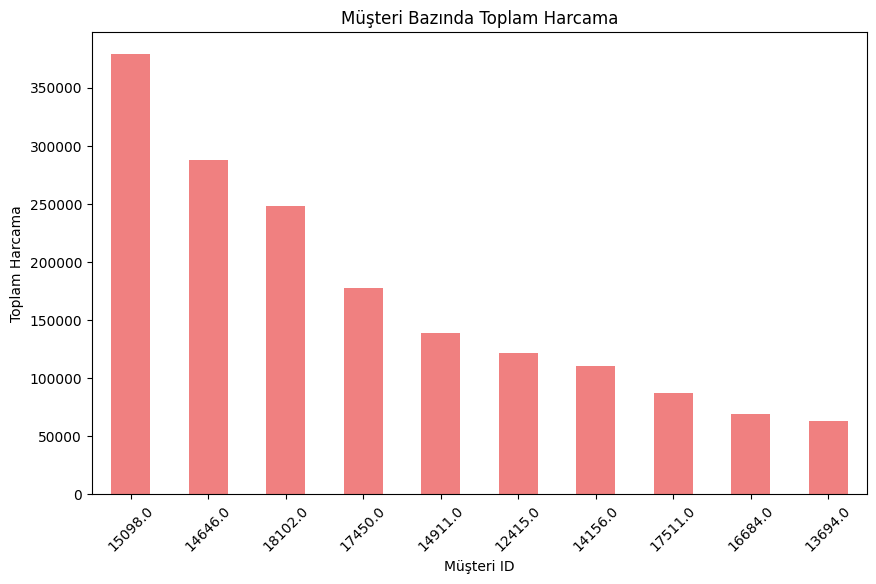

In [50]:
# Müşteri bazında toplam harcama
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Grafik
plt.figure(figsize=(10, 6))
customer_spending.plot(kind='bar', color='lightcoral')
plt.title('Müşteri Bazında Toplam Harcama')
plt.xlabel('Müşteri ID')
plt.ylabel('Toplam Harcama')
plt.xticks(rotation=45)
plt.show()
